In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, shape
import geopandas as gpd
import pickle

pd.set_option('display.max_columns', 999)

# Data loading/cleaning

In [2]:
# Initial reading of data
df = pd.read_csv('../data/tweets/bo_2012.csv')

print(df.shape)
df.head()

(1941020, 17)


,id,u_id,lat,lon,created_at,type,place_type,u_created_at,u_followers_count,u_location,u_lang,u_statuses_count,u_name,u_screen_name,u_description,urls,text
0,227552831668899840,430816123,4.713839,-74.122245,1343087797000,ll,NaN,1323274068000,5,NaN,es,102,Alexander agudelo l,dagudelo44,NaN,NaN,@NoticiasCaracol Que se puede esperar de un ti...
1,227552828263112704,508043613,4.733711,-74.088814,1343087796000,ll,NaN,1330469805000,197,COLOMBIA,es,4720,paola blanco,paola7999,"SOY UNA PERSONA SIN IGUAL Y SIEMPRE IGUAL, ME...",NaN,@Nathaa_B quien era jaj ? El de la foto
2,227554902044463105,93915086,4.679966,-74.082034,1343088291000,ll,NaN,1259692441000,101,Bogotá,es,4380,Juan Pablo Arevalo,juanparebalo,"Future chef, proud of be myself, I learned to ...",NaN,@revesdevie je connaî qui ça tuit ete pour le ...
3,227554979450343424,49848950,4.693087,-74.046969,1343088309000,ll,NaN,1245722459000,317,Bogotá,en,1152,Lina María Echeverri,linaec,Me apasiona el estudio de la marca país.,NaN,@pamepryor increíble tenemos una tecnoreligión...
4,227554974928883712,148559355,4.641350,-74.141410,1343088308000,ll,NaN,1274922133000,37,Bogotà,es,235,March CamargoG,MarZzus,Nisiquiera cuando era niña me gustaba jugar a ...,NaN,Que carga tan pesada es extraÑar #Guadalupe


In [3]:
# Select only users with greater than 20 tweets
df = df.groupby('u_id').filter(lambda group: len(group) > 20)

print(df.shape)
df.head()

(1704603, 17)


,id,u_id,lat,lon,created_at,type,place_type,u_created_at,u_followers_count,u_location,u_lang,u_statuses_count,u_name,u_screen_name,u_description,urls,text
0,227552831668899840,430816123,4.713839,-74.122245,1343087797000,ll,NaN,1323274068000,5,NaN,es,102,Alexander agudelo l,dagudelo44,NaN,NaN,@NoticiasCaracol Que se puede esperar de un ti...
1,227552828263112704,508043613,4.733711,-74.088814,1343087796000,ll,NaN,1330469805000,197,COLOMBIA,es,4720,paola blanco,paola7999,"SOY UNA PERSONA SIN IGUAL Y SIEMPRE IGUAL, ME...",NaN,@Nathaa_B quien era jaj ? El de la foto
2,227554902044463105,93915086,4.679966,-74.082034,1343088291000,ll,NaN,1259692441000,101,Bogotá,es,4380,Juan Pablo Arevalo,juanparebalo,"Future chef, proud of be myself, I learned to ...",NaN,@revesdevie je connaî qui ça tuit ete pour le ...
3,227554979450343424,49848950,4.693087,-74.046969,1343088309000,ll,NaN,1245722459000,317,Bogotá,en,1152,Lina María Echeverri,linaec,Me apasiona el estudio de la marca país.,NaN,@pamepryor increíble tenemos una tecnoreligión...
6,227556208112963585,228968872,4.661234,-74.059706,1343088602000,ll,NaN,1292908072000,114,bogotá,es,897,MojiCaro,marlonmojica,"Finanzas y Comercio Exterior USA, Emprendedor,...",NaN,Clase: fundamentos de fotografía digital


In [4]:
# Create a shapely.geometry.Point for each tweet
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
crs = {'init' :'epsg:4326'}

# Convert to GeoDataFrame, where each tweet's geometry is assigned to the lat/lon coords
gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

# Add tract to each tweet

In [5]:
bogota_shapefiles = gpd.read_file("../data/shapefiles/bogota_shapefiles/shp_secciondata.shp")

print(bogota_shapefiles.shape)
bogota_shapefiles.head()

(2787, 200)


,OBJECTID,SETR_CLSE_,SECR_SETR_,CPOB_SECR_,SETU_CPOB_,SETU_CPOB1,SETU_CPO_1,SETU_SETU_,SECU_CCDGO,SECU_CCNCT,SECU_NAREA,SECU_CSMBL,SECU_NANO,SHAPE_Leng,SHAPE_Area,Area,sector_urb,seccion_ur,SECU_CCN_1,dupe,l_santafe,l_candelar,localities,l_martires,l_chapiner,b_lasaguas,b_bosqueiz,b_lacatedr,b_laconcor,b_lasnieve,b_veracruz,barrios_fe,b_votonaci,b_santaine,b_sanberna,b_sanvicto,b_eduardos,b_laestanz,barrios_br,b_juanxxii,b_mariacri,b_lasacaci,b_granada,b_lasalle,b_emaus,barrios_ju,cs_fenicia,cs_bronx,cs_juanxxi,h1_total_h,h2_activ_e,h2_activ_1,v1_total_v,v1_hog_0,v1_hog_1,v1_hog_2,v1_hog_3,v2_desocup,v2_desoc_1,v2_ocup_pe,v2_ocup_al,v2_total_v,v3_total_u,v3_uso_lea,v3_uso_uni,v3_uso_viv,v4_apartam,v4_casa,v4_casa_in,v4_otro_ti,v4_cuarto,v4_total_t,v5_electr_,v5_electr1,v5_total_e,v6_alcanta,v6_alcan_1,v6_total_c,v7_acueduc,v7_acued_1,v7_total_c,v8_gas_nat,v8_gas_n_1,v8_gas_n_2,v8_total_c,v9_tel_no,v9_tel_no_,v9_tel_si,v9_total_c,p1_hombres,p1_mujer,p1_total_p,p2_edad_0_,p2_edad_10,p2_edad_20,p2_edad_30,p2_edad_40,p2_edad_50,p2_edad_60,p2_edad_70,p2_edad_80,p2_total_p,p3_casado,p3_no_info,p3_no_casa,p3_no_ca_1,p3_divorci,p3_soltero,p3_total_e,p3_viudo,p4_leer_es,p4_leer__1,p4_leer__2,p4_total_l,p5_primari,p5_secunda,p5_doctora,p5_especia,p5_maestri,p5_media_c,p5_media_t,p5_ninguno,p5_no_info,p5_normali,p5_preesco,p5_profesi,p5_tecnolo,p5_total_t,p5_tec_pro,p6_preesc_,p6_preesc1,p6_prees_1,p6_prim_1,p6_prim_2,p6_prim_3,p6_prim_4,p6_prim_5,p6x_less_t,p6_sec_6,p6_sec_7,p6_sec_8,p6_sec_9,p6_med_cla,p6_med_c_1,p6_med_tec,p6_med_t_1,p6_norma_1,p6_norma_2,p6x_some_h,p6x_hs_com,p6_norma_3,p6_norma_4,p6_sup_pos,p6x_post_h,p6_ninguno,p6_no_info,p6_invalid,p6_caso_ig,p6_nivel_a,p7_busca_t,p7_busca_p,p7x_buscar,p7_estudio,p7_otra_si,p7_incapac,p7_no_info,p7_no_tra_,p7_oficios,p7_total_t,p7_trabajo,p7x_trabaj,p7_jubli_o,p8_cambio_,p8_no_info,p8_cambio1,p8_cambi_1,p9_casos_c,p9_cambio_,p9_cambio1,p9_cambi_1,p9_cambi_2,p9_cambi_3,p9_cambi_4,p9_cambi_5,p9_casos_i,p10_este_m,p10_otro_m,p10_otro_p,p10_no_inf,p10_res_an,p11_amenaz,p11_encont,p11_nomada,p11_salud,p11_educac,p11_no_inf,p11_motiv_,p11_desas_,p11_causa_,geometry
0,7593,11,001,1,000,00,000,9113,02,11001100000000911302,718064.486751,10,2005,0.035906,0.000059,1100111100000000911302,8401.0,02,11001100000000911302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,385.0,375.0,10.0,411.0,29.0,379.0,3.0,0.0,0.0,29.0,0.0,382.0,411.0,442.0,3.0,28.0,411.0,35.0,365.0,0.0,0.0,11.0,411.0,3.0,382.0,385.0,374.0,11.0,385.0,8.0,377.0,385.0,122.0,0.0,263.0,385.0,23.0,0.0,362.0,385.0,783.0,1006.0,1789.0,258.0,485.0,284.0,212.0,295.0,164.0,47.0,23.0,21.0,1789.0,515.0,0.0,8.0,112.0,64.0,798.0,1531.0,34.0,166.0,0.0,1575.0,1741.0,375.0,290.0,16.0,100.0,36.0,182.0,35.0,139.0,0.0,4.0,93.0,415.0,28.0,1741.0,28.0,26.0,34.0,33.0,44.0,52.0,60.0,68.0,151.0,468.0,71.0,72.0,86.0,61.0,43.0,139.0,4.0,31.0,1.0,1.0,338.0,171.0,0.0,2.0,623.0,625.0,139.0,0.0,0.0,48.0,1741.0,11.0,2.0,13.0,656.0,133.0,5.0,1.0,9.0,132.0,1700.0,704.0,713.0,47.0,918.0,1.0,870.0,1789.0,869.0,35.0,53.0,134.0,199.0,182.0,266.0,0.0,1.0,636.0,190.0,43.0,1.0,870.0,15.0,187.0,249.0,25.0,83.0,0.0,310.0,1.0,870.0,POLYGON ((-74.05634730399998 4.767561391000072...
1,7594,11,001,1,000,00,000,9114,01,11001100000000911401,102613.199186,10,2005,0.012689,0.000008,1100111100000000911401,8401.0,01,11001100000000911401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,546.0,535.0,11.0,563.0,36.0,516.0,7.0,4.0,5.0,31.0,0.0,527.0,563.0,640.0,0.0,77.0,563.0,164.0,378.0,0.0,1.0,20.0,563.0,1.0,526.0,527.0,4.0,523.0,527.0,2.0,525.0,527.0,62.0,0.0,465.0,527.0,34.0,0.0,493.0,527.0,813.0,969.0,1782.0,231.0,309.0,326.0,276.0,282.0,202.0,98.0,43.0,15.0,1782.0,477.0,2.0,16.0,149.0,130.0,706.0,1551.0,71.0,59.0,1.0,1661.0,1721.0,240.0,215.0,1.0,103.0,14.0,270.0,56.0,30.0,1.0,9.0,80.0,543.0,79.0,1721.0,80.0,20.0,31.0,29.0,33.0,21.0,36.0,40

Each row represents one tract in Bogota, which we see below by plotting the entire dataframe's geometries onto a coordinate plane:

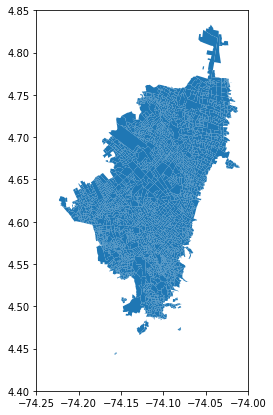

In [6]:
fig, ax = plt.subplots(figsize=(10, 7))

bogota_shapefiles.plot(ax=ax)
ax.set_xlim(-74.25, -74)
ax.set_ylim(4.4, 4.85);

Using the tweet locations (lat/lon) and geometries of the tracts, we can perform a spatial join to assign each tweet to a tract.

In [7]:
# gdf = gpd.sjoin(gdf, bogota_shapefiles, how='left', op='intersects')

#### TEMPORARY: Use sample of tweets instead to save computational time
gsample = gdf.sample(n=100000, random_state=42)
gsample = gpd.sjoin(gsample, bogota_shapefiles, how='left', op='intersects')

As a sanity check, we can plot the tweets over the map to be sure that they overlap. Since there are over 1.7 million tweets, we take just a small sample as a precautionary measure to prevent overplotting. Here, we color by whether or not the tweet successfully joins with a tract or not:

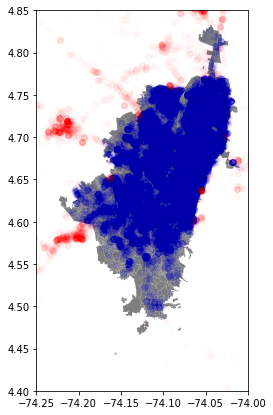

In [8]:
# gsample = gdf.sample(n=10000, random_state=42)

fig, ax = plt.subplots(figsize=(10, 7))
bogota_shapefiles['geometry'].plot(ax=ax, color='gray')
gsample[~gsample['index_right'].isnull()].plot(ax=ax, marker='o', color='blue', alpha=0.01)
gsample[gsample['index_right'].isnull()].plot(ax=ax, marker='o', color='red', alpha=0.01)
ax.set_ylim(4.4, 4.85)
ax.set_xlim(-74.25, -74);

In [10]:
print(gsample.shape)
gsample.head()

(100000, 218)


,id,u_id,lat,lon,created_at,type,place_type,u_created_at,u_followers_count,u_location,u_lang,u_statuses_count,u_name,u_screen_name,u_description,urls,text,geometry,index_right,OBJECTID,SETR_CLSE_,SECR_SETR_,CPOB_SECR_,SETU_CPOB_,SETU_CPOB1,SETU_CPO_1,SETU_SETU_,SECU_CCDGO,SECU_CCNCT,SECU_NAREA,SECU_CSMBL,SECU_NANO,SHAPE_Leng,SHAPE_Area,Area,sector_urb,seccion_ur,SECU_CCN_1,dupe,l_santafe,l_candelar,localities,l_martires,l_chapiner,b_lasaguas,b_bosqueiz,b_lacatedr,b_laconcor,b_lasnieve,b_veracruz,barrios_fe,b_votonaci,b_santaine,b_sanberna,b_sanvicto,b_eduardos,b_laestanz,barrios_br,b_juanxxii,b_mariacri,b_lasacaci,b_granada,b_lasalle,b_emaus,barrios_ju,cs_fenicia,cs_bronx,cs_juanxxi,h1_total_h,h2_activ_e,h2_activ_1,v1_total_v,v1_hog_0,v1_hog_1,v1_hog_2,v1_hog_3,v2_desocup,v2_desoc_1,v2_ocup_pe,v2_ocup_al,v2_total_v,v3_total_u,v3_uso_lea,v3_uso_uni,v3_uso_viv,v4_apartam,v4_casa,v4_casa_in,v4_otro_ti,v4_cuarto,v4_total_t,v5_electr_,v5_electr1,v5_total_e,v6_alcanta,v6_alcan_1,v6_total_c,v7_acueduc,v7_acued_1,v7_total_c,v8_gas_nat,v8_gas_n_1,v8_gas_n_2,v8_total_c,v9_tel_no,v9_tel_no_,v9_tel_si,v9_total_c,p1_hombres,p1_mujer,p1_total_p,p2_edad_0_,p2_edad_10,p2_edad_20,p2_edad_30,p2_edad_40,p2_edad_50,p2_edad_60,p2_edad_70,p2_edad_80,p2_total_p,p3_casado,p3_no_info,p3_no_casa,p3_no_ca_1,p3_divorci,p3_soltero,p3_total_e,p3_viudo,p4_leer_es,p4_leer__1,p4_leer__2,p4_total_l,p5_primari,p5_secunda,p5_doctora,p5_especia,p5_maestri,p5_media_c,p5_media_t,p5_ninguno,p5_no_info,p5_normali,p5_preesco,p5_profesi,p5_tecnolo,p5_total_t,p5_tec_pro,p6_preesc_,p6_preesc1,p6_prees_1,p6_prim_1,p6_prim_2,p6_prim_3,p6_prim_4,p6_prim_5,p6x_less_t,p6_sec_6,p6_sec_7,p6_sec_8,p6_sec_9,p6_med_cla,p6_med_c_1,p6_med_tec,p6_med_t_1,p6_norma_1,p6_norma_2,p6x_some_h,p6x_hs_com,p6_norma_3,p6_norma_4,p6_sup_pos,p6x_post_h,p6_ninguno,p6_no_info,p6_invalid,p6_caso_ig,p6_nivel_a,p7_busca_t,p7_busca_p,p7x_buscar,p7_estudio,p7_otra_si,p7_incapac,p7_no_info,p7_no_tra_,p7_oficios,p7_total_t,p7_trabajo,p7x_trabaj,p7_jubli_o,p8_cambio_,p8_no_info,p8_cambio1,p8_cambi_1,p9_casos_c,p9_cambio_,p9_cambio1,p9_cambi_1,p9_cambi_2,p9_cambi_3,p9_cambi_4,p9_cambi_5,p9_casos_i,p10_este_m,p10_otro_m,p10_otro_p,p10_no_inf,p10_res_an,p11_amenaz,p11_encont,p11_nomada,p11_salud,p11_educac,p11_no_inf,p11_motiv_,p11_desas_,p11_causa_
706686,279407186667528193,314194141,4.648958,-74.166965,1355450839000,ll,NaN,1307654669000,289,en la LUUNAA,es,1253,Kariitho Cisf ♪♫♪♫,karoquinterob,*AmoooA santa fe soy hincha fiel de la cuna al...,NaN,M€ €NCAN7A LA MU$!CA Q €STA SONANDO A €S7A HOR...,POINT (-74.16696526 4.64895789),295.0,9247.0,11,001,1,000,00,000,4555,01,11001100000000455501,475115.058323,10,2005.0,0.028706,0.000039,1100110800000000455501,8401.0,01,11001100000000455501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,482.0,14.0,509.0,17.0,489.0,2.0,1.0,0.0,17.0,0.0,492.0,509.0,531.0,0.0,22.0,509.0,20.0,488.0,0.0,0.0,1.0,509.0,1.0,491.0,492.0,1.0,491.0,492.0,2.0,490.0,492.0,11.0,1.0,480.0,492.0,18.0,1.0,473.0,492.0,1227.0,1356.0,2583.0,831.0,491.0,450.0,389.0,234.0,126.0,42.0,13.0,7.0,2583.0,400.0,7.0,21.0,371.0,84.0,830.0,1752.0,39.0,177.0,6.0,2076.0,2259.0,502.0,472.0,1.0,15.0,8.0,391.0,139.0,91.0,8.0,2.0,208.0,237.0,70.0,2259.0,115.0,72.0,53.0,83.0,66.0,94.0,90.0,72.0,180.0,710.0,104.0,94.0,100.0,174.0,65.0,326.0,17.0,122.0,0.0,2.0,554.0,450.0,0.0,0.0,446.0,446.0,91.0,8.0,0.0,324.0,2259.0,61.0,18.0,79.0,662.0,179.0,10.0,14.0,27.0,193.0,2131.0,956.0,983.0,11.0,1259.0,24.0,1300.0,2583.0,1286.0,17.0,14.0,195.0,361.0,290.0,409.0,0.0,14.0,1265.0,34.0,0.0,1.0,1300.0,8.0,19.0,18.0,11.0,6.0,5.0,1231.0,2.0,1300.0
1565363,274005855517687808,85619927,4.692491,-74.155670,1354163061000,ll,NaN,1256665352000,53,Bogota,es,1057,Sergio Medellin,AsTaRoTh1988,CISF 1941 herencia cardenal orgullo capital *...,NaN,@TatoRamiReZ a paola le sobra actitud asi debe...,POINT (-74.15567 4.692491),1914.0,14544.0,11,001,1,000,00,000,6414,01,110011

# Extract home location

Ate's methodology for extracting home location:

1. Consider tracts satisfying the following properties:
    - More than 10 tweets total
    - Sent from more than 10 different days
    - Sent from more than 8 different hours of the day
2. Of the remaining candidates, select the tract with the most tweets

## 1a. More than 10 tweets total

Explanation of code below:

1. From our data
1. Group by user `u_id` and tract `OBJECTID` (assumed to be the tract ID)
1. Select only the user-tract combinations for which there are more than `MIN_TWEETS` tweets (i.e. for each user, select only the tracts with more than `MIN_TWEETS` tweets)

In [11]:
# This value should be adjusted when using the entire dataset
MIN_TWEETS = 2

output_1a = (
    gsample # (1)
    .groupby(['u_id', 'OBJECTID']) # (2)
    .filter(lambda user_tract: len(user_tract) > MIN_TWEETS) # (3)
)

In [12]:
print(output_1a.shape)
output_1a.head()

(48882, 218)


,id,u_id,lat,lon,created_at,type,place_type,u_created_at,u_followers_count,u_location,u_lang,u_statuses_count,u_name,u_screen_name,u_description,urls,text,geometry,index_right,OBJECTID,SETR_CLSE_,SECR_SETR_,CPOB_SECR_,SETU_CPOB_,SETU_CPOB1,SETU_CPO_1,SETU_SETU_,SECU_CCDGO,SECU_CCNCT,SECU_NAREA,SECU_CSMBL,SECU_NANO,SHAPE_Leng,SHAPE_Area,Area,sector_urb,seccion_ur,SECU_CCN_1,dupe,l_santafe,l_candelar,localities,l_martires,l_chapiner,b_lasaguas,b_bosqueiz,b_lacatedr,b_laconcor,b_lasnieve,b_veracruz,barrios_fe,b_votonaci,b_santaine,b_sanberna,b_sanvicto,b_eduardos,b_laestanz,barrios_br,b_juanxxii,b_mariacri,b_lasacaci,b_granada,b_lasalle,b_emaus,barrios_ju,cs_fenicia,cs_bronx,cs_juanxxi,h1_total_h,h2_activ_e,h2_activ_1,v1_total_v,v1_hog_0,v1_hog_1,v1_hog_2,v1_hog_3,v2_desocup,v2_desoc_1,v2_ocup_pe,v2_ocup_al,v2_total_v,v3_total_u,v3_uso_lea,v3_uso_uni,v3_uso_viv,v4_apartam,v4_casa,v4_casa_in,v4_otro_ti,v4_cuarto,v4_total_t,v5_electr_,v5_electr1,v5_total_e,v6_alcanta,v6_alcan_1,v6_total_c,v7_acueduc,v7_acued_1,v7_total_c,v8_gas_nat,v8_gas_n_1,v8_gas_n_2,v8_total_c,v9_tel_no,v9_tel_no_,v9_tel_si,v9_total_c,p1_hombres,p1_mujer,p1_total_p,p2_edad_0_,p2_edad_10,p2_edad_20,p2_edad_30,p2_edad_40,p2_edad_50,p2_edad_60,p2_edad_70,p2_edad_80,p2_total_p,p3_casado,p3_no_info,p3_no_casa,p3_no_ca_1,p3_divorci,p3_soltero,p3_total_e,p3_viudo,p4_leer_es,p4_leer__1,p4_leer__2,p4_total_l,p5_primari,p5_secunda,p5_doctora,p5_especia,p5_maestri,p5_media_c,p5_media_t,p5_ninguno,p5_no_info,p5_normali,p5_preesco,p5_profesi,p5_tecnolo,p5_total_t,p5_tec_pro,p6_preesc_,p6_preesc1,p6_prees_1,p6_prim_1,p6_prim_2,p6_prim_3,p6_prim_4,p6_prim_5,p6x_less_t,p6_sec_6,p6_sec_7,p6_sec_8,p6_sec_9,p6_med_cla,p6_med_c_1,p6_med_tec,p6_med_t_1,p6_norma_1,p6_norma_2,p6x_some_h,p6x_hs_com,p6_norma_3,p6_norma_4,p6_sup_pos,p6x_post_h,p6_ninguno,p6_no_info,p6_invalid,p6_caso_ig,p6_nivel_a,p7_busca_t,p7_busca_p,p7x_buscar,p7_estudio,p7_otra_si,p7_incapac,p7_no_info,p7_no_tra_,p7_oficios,p7_total_t,p7_trabajo,p7x_trabaj,p7_jubli_o,p8_cambio_,p8_no_info,p8_cambio1,p8_cambi_1,p9_casos_c,p9_cambio_,p9_cambio1,p9_cambi_1,p9_cambi_2,p9_cambi_3,p9_cambi_4,p9_cambi_5,p9_casos_i,p10_este_m,p10_otro_m,p10_otro_p,p10_no_inf,p10_res_an,p11_amenaz,p11_encont,p11_nomada,p11_salud,p11_educac,p11_no_inf,p11_motiv_,p11_desas_,p11_causa_
1565363,274005855517687808,85619927,4.692491,-74.155670,1354163061000,ll,NaN,1256665352000,53,Bogota,es,1057,Sergio Medellin,AsTaRoTh1988,CISF 1941 herencia cardenal orgullo capital *...,NaN,@TatoRamiReZ a paola le sobra actitud asi debe...,POINT (-74.15567 4.692491),1914.0,14544.0,11,001,1,000,00,000,6414,01,11001100000000641401,435244.730436,10,2005.0,0.027972,0.000035,1100110900000000641401,8401.0,01,11001100000000641401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,621.0,592.0,29.0,608.0,37.0,534.0,27.0,10.0,1.0,36.0,0.0,571.0,608.0,714.0,0.0,106.0,608.0,290.0,228.0,0.0,0.0,90.0,608.0,2.0,569.0,571.0,0.0,571.0,571.0,0.0,571.0,571.0,165.0,0.0,406.0,571.0,140.0,0.0,431.0,571.0,1075.0,1120.0,2195.0,462.0,436.0,416.0,341.0,302.0,146.0,48.0,31.0,13.0,2195.0,396.0,1.0,52.0,435.0,85.0,714.0,1733.0,50.0,153.0,1.0,1917.0,2071.0,692.0,535.0,0.0,5.0,0.0,293.0,154.0,108.0,1.0,4.0,107.0,78.0,39.0,2071.0,55.0,34.0,29.0,44.0,82.0,90.0,99.0,86.0,335.0,799.0,114.0,154.0,130.0,137.0,50.0,243.0,18.0,136.0,0.0,1.0,603.0,380.0,0.0,3.0,177.0,180.0,108.0,1.0,0.0,124.0,2071.0,96.0,5.0,101.0,392.0,245.0,21.0,1.0,15.0,340.0,1987.0,842.0,857.0,30.0,1362.0,4.0,829.0,2195.0,829.0,23.0,42.0,97.0,137.0,199.0,331.0,0.0,0.0,699.0,128.0,2.0,0.0,829.0,15.0,91.0,366.0,6.0,13.0,0.0,337.0,1.0,829.0
122943,255705894707404800,40723389,4.652964,-74.059113,1349800010000,ll,NaN,1242589832000,85,"Colombia, Bogotá",en,6072,••Matt••,LauraHK03,03/02/99 ❤,NaN,La señora de enfrente tiene un perfume muy dul...,POINT (-74.05911315 4.65296393),2332.0,16290.0,11,001,1,000,00,000,8201,01,11001100000000820101,209384.018721,10,2005.0,0.01623

In [13]:
# Sanity check
assert all(output_1a.groupby(['u_id', 'OBJECTID']).size() > MIN_TWEETS)

## 1b. Sent from more than 10 different days

In [14]:
# First, some cleaning: extract timestamp from tweet data.
# Each tweet is recorded in UNIX time, and (for some reason) multiplied by 1000
output_1a['timestamp'] = pd.to_datetime(output_1a['created_at'] // 1000, unit='s')
output_1a['date'] = output_1a['timestamp'].dt.date

output_1a[['id', 'text', 'date']].head()

/mnt/c/Users/Junseo/Documents/data-science/.env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/mnt/c/Users/Junseo/Documents/data-science/.env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,id,text,date
1565363,274005855517687808,@TatoRamiReZ a paola le sobra actitud asi debe...,2012-11-29
122943,255705894707404800,La señora de enfrente tiene un perfume muy dul...,2012-10-09
731696,278964526836224002,"Hola , estoy hablando lengüisopa",2012-12-12
1152772,252966436388098049,@Ricardoacosta9 jajajajajaja no las hagas y se...,2012-10-02
750081,268795674559127552,Y a quién le cobro lo que deje de vender hoy p...,2012-11-14


Explanation of code below:

1. From our data
1. Group by user `u_id` and tract `OBJECTID`
1. Select user-tract combinations for which there are more than `MIN_DAYS` unique dates

In [15]:
# This value should be adjusted when using the full dataset
MIN_DAYS = 2

output_1b = (
    output_1a # (1)
    .groupby(['u_id', 'OBJECTID']) # (2)
    .filter(lambda user_tract: user_tract['date'].nunique() > MIN_DAYS) # (3)
)

In [16]:
print(output_1b.shape)
output_1b.head()

(44223, 220)


,id,u_id,lat,lon,created_at,type,place_type,u_created_at,u_followers_count,u_location,u_lang,u_statuses_count,u_name,u_screen_name,u_description,urls,text,geometry,index_right,OBJECTID,SETR_CLSE_,SECR_SETR_,CPOB_SECR_,SETU_CPOB_,SETU_CPOB1,SETU_CPO_1,SETU_SETU_,SECU_CCDGO,SECU_CCNCT,SECU_NAREA,SECU_CSMBL,SECU_NANO,SHAPE_Leng,SHAPE_Area,Area,sector_urb,seccion_ur,SECU_CCN_1,dupe,l_santafe,l_candelar,localities,l_martires,l_chapiner,b_lasaguas,b_bosqueiz,b_lacatedr,b_laconcor,b_lasnieve,b_veracruz,barrios_fe,b_votonaci,b_santaine,b_sanberna,b_sanvicto,b_eduardos,b_laestanz,barrios_br,b_juanxxii,b_mariacri,b_lasacaci,b_granada,b_lasalle,b_emaus,barrios_ju,cs_fenicia,cs_bronx,cs_juanxxi,h1_total_h,h2_activ_e,h2_activ_1,v1_total_v,v1_hog_0,v1_hog_1,v1_hog_2,v1_hog_3,v2_desocup,v2_desoc_1,v2_ocup_pe,v2_ocup_al,v2_total_v,v3_total_u,v3_uso_lea,v3_uso_uni,v3_uso_viv,v4_apartam,v4_casa,v4_casa_in,v4_otro_ti,v4_cuarto,v4_total_t,v5_electr_,v5_electr1,v5_total_e,v6_alcanta,v6_alcan_1,v6_total_c,v7_acueduc,v7_acued_1,v7_total_c,v8_gas_nat,v8_gas_n_1,v8_gas_n_2,v8_total_c,v9_tel_no,v9_tel_no_,v9_tel_si,v9_total_c,p1_hombres,p1_mujer,p1_total_p,p2_edad_0_,p2_edad_10,p2_edad_20,p2_edad_30,p2_edad_40,p2_edad_50,p2_edad_60,p2_edad_70,p2_edad_80,p2_total_p,p3_casado,p3_no_info,p3_no_casa,p3_no_ca_1,p3_divorci,p3_soltero,p3_total_e,p3_viudo,p4_leer_es,p4_leer__1,p4_leer__2,p4_total_l,p5_primari,p5_secunda,p5_doctora,p5_especia,p5_maestri,p5_media_c,p5_media_t,p5_ninguno,p5_no_info,p5_normali,p5_preesco,p5_profesi,p5_tecnolo,p5_total_t,p5_tec_pro,p6_preesc_,p6_preesc1,p6_prees_1,p6_prim_1,p6_prim_2,p6_prim_3,p6_prim_4,p6_prim_5,p6x_less_t,p6_sec_6,p6_sec_7,p6_sec_8,p6_sec_9,p6_med_cla,p6_med_c_1,p6_med_tec,p6_med_t_1,p6_norma_1,p6_norma_2,p6x_some_h,p6x_hs_com,p6_norma_3,p6_norma_4,p6_sup_pos,p6x_post_h,p6_ninguno,p6_no_info,p6_invalid,p6_caso_ig,p6_nivel_a,p7_busca_t,p7_busca_p,p7x_buscar,p7_estudio,p7_otra_si,p7_incapac,p7_no_info,p7_no_tra_,p7_oficios,p7_total_t,p7_trabajo,p7x_trabaj,p7_jubli_o,p8_cambio_,p8_no_info,p8_cambio1,p8_cambi_1,p9_casos_c,p9_cambio_,p9_cambio1,p9_cambi_1,p9_cambi_2,p9_cambi_3,p9_cambi_4,p9_cambi_5,p9_casos_i,p10_este_m,p10_otro_m,p10_otro_p,p10_no_inf,p10_res_an,p11_amenaz,p11_encont,p11_nomada,p11_salud,p11_educac,p11_no_inf,p11_motiv_,p11_desas_,p11_causa_,timestamp,date
1565363,274005855517687808,85619927,4.692491,-74.155670,1354163061000,ll,NaN,1256665352000,53,Bogota,es,1057,Sergio Medellin,AsTaRoTh1988,CISF 1941 herencia cardenal orgullo capital *...,NaN,@TatoRamiReZ a paola le sobra actitud asi debe...,POINT (-74.15567 4.692491),1914.0,14544.0,11,001,1,000,00,000,6414,01,11001100000000641401,435244.730436,10,2005.0,0.027972,0.000035,1100110900000000641401,8401.0,01,11001100000000641401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,621.0,592.0,29.0,608.0,37.0,534.0,27.0,10.0,1.0,36.0,0.0,571.0,608.0,714.0,0.0,106.0,608.0,290.0,228.0,0.0,0.0,90.0,608.0,2.0,569.0,571.0,0.0,571.0,571.0,0.0,571.0,571.0,165.0,0.0,406.0,571.0,140.0,0.0,431.0,571.0,1075.0,1120.0,2195.0,462.0,436.0,416.0,341.0,302.0,146.0,48.0,31.0,13.0,2195.0,396.0,1.0,52.0,435.0,85.0,714.0,1733.0,50.0,153.0,1.0,1917.0,2071.0,692.0,535.0,0.0,5.0,0.0,293.0,154.0,108.0,1.0,4.0,107.0,78.0,39.0,2071.0,55.0,34.0,29.0,44.0,82.0,90.0,99.0,86.0,335.0,799.0,114.0,154.0,130.0,137.0,50.0,243.0,18.0,136.0,0.0,1.0,603.0,380.0,0.0,3.0,177.0,180.0,108.0,1.0,0.0,124.0,2071.0,96.0,5.0,101.0,392.0,245.0,21.0,1.0,15.0,340.0,1987.0,842.0,857.0,30.0,1362.0,4.0,829.0,2195.0,829.0,23.0,42.0,97.0,137.0,199.0,331.0,0.0,0.0,699.0,128.0,2.0,0.0,829.0,15.0,91.0,366.0,6.0,13.0,0.0,337.0,1.0,829.0,2012-11-29 04:24:21,2012-11-29
731696,278964526836224002,262856391,4.716027,-74.108425,1355345300000,ll,NaN,1299622719000,112,NaN,es,4665,Angie Gonzalez,AngieGonzalezE,"Digo con orgullo , de millos nada mas ♥ MFC ♥",NaN,"Hola , estoy hablando lengüisopa",POINT (-74.10842475 4.71602721),1632.0,13348.0,11,001,1,000,0

In [17]:
# Sanity check
assert all(output_1b.groupby(['u_id', 'OBJECTID'])['date'].nunique() > MIN_DAYS)

## 1c. Sent from more than 8 different hours of the day

In [18]:
output_1b['hour'] = output_1b['timestamp'].dt.hour
output_1b[['id', 'text', 'hour']].head()

/mnt/c/Users/Junseo/Documents/data-science/.env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,text,hour
1565363,274005855517687808,@TatoRamiReZ a paola le sobra actitud asi debe...,4
731696,278964526836224002,"Hola , estoy hablando lengüisopa",20
1152772,252966436388098049,@Ricardoacosta9 jajajajajaja no las hagas y se...,3
750081,268795674559127552,Y a quién le cobro lo que deje de vender hoy p...,19
1835054,263495773017219073,Acaba de publicar una foto @ The Cup&amp;Cakes...,4


Explanation of code below:

1. From our data
1. Group by user `u_id` and tract `OBJECTID`
1. Select user-tract combinations for which there are more than `MIN_HOURS` unique hours

In [19]:
# This value should be adjusted when using the full dataset
MIN_HOURS = 4

output_1c = (
    output_1b # (1)
    .groupby(['u_id', 'OBJECTID']) # (2)
    .filter(lambda user_tract: user_tract['hour'].nunique() > MIN_HOURS) # (3)
)

In [20]:
print(output_1c.shape)
output_1c.head()

(30980, 221)


,id,u_id,lat,lon,created_at,type,place_type,u_created_at,u_followers_count,u_location,u_lang,u_statuses_count,u_name,u_screen_name,u_description,urls,text,geometry,index_right,OBJECTID,SETR_CLSE_,SECR_SETR_,CPOB_SECR_,SETU_CPOB_,SETU_CPOB1,SETU_CPO_1,SETU_SETU_,SECU_CCDGO,SECU_CCNCT,SECU_NAREA,SECU_CSMBL,SECU_NANO,SHAPE_Leng,SHAPE_Area,Area,sector_urb,seccion_ur,SECU_CCN_1,dupe,l_santafe,l_candelar,localities,l_martires,l_chapiner,b_lasaguas,b_bosqueiz,b_lacatedr,b_laconcor,b_lasnieve,b_veracruz,barrios_fe,b_votonaci,b_santaine,b_sanberna,b_sanvicto,b_eduardos,b_laestanz,barrios_br,b_juanxxii,b_mariacri,b_lasacaci,b_granada,b_lasalle,b_emaus,barrios_ju,cs_fenicia,cs_bronx,cs_juanxxi,h1_total_h,h2_activ_e,h2_activ_1,v1_total_v,v1_hog_0,v1_hog_1,v1_hog_2,v1_hog_3,v2_desocup,v2_desoc_1,v2_ocup_pe,v2_ocup_al,v2_total_v,v3_total_u,v3_uso_lea,v3_uso_uni,v3_uso_viv,v4_apartam,v4_casa,v4_casa_in,v4_otro_ti,v4_cuarto,v4_total_t,v5_electr_,v5_electr1,v5_total_e,v6_alcanta,v6_alcan_1,v6_total_c,v7_acueduc,v7_acued_1,v7_total_c,v8_gas_nat,v8_gas_n_1,v8_gas_n_2,v8_total_c,v9_tel_no,v9_tel_no_,v9_tel_si,v9_total_c,p1_hombres,p1_mujer,p1_total_p,p2_edad_0_,p2_edad_10,p2_edad_20,p2_edad_30,p2_edad_40,p2_edad_50,p2_edad_60,p2_edad_70,p2_edad_80,p2_total_p,p3_casado,p3_no_info,p3_no_casa,p3_no_ca_1,p3_divorci,p3_soltero,p3_total_e,p3_viudo,p4_leer_es,p4_leer__1,p4_leer__2,p4_total_l,p5_primari,p5_secunda,p5_doctora,p5_especia,p5_maestri,p5_media_c,p5_media_t,p5_ninguno,p5_no_info,p5_normali,p5_preesco,p5_profesi,p5_tecnolo,p5_total_t,p5_tec_pro,p6_preesc_,p6_preesc1,p6_prees_1,p6_prim_1,p6_prim_2,p6_prim_3,p6_prim_4,p6_prim_5,p6x_less_t,p6_sec_6,p6_sec_7,p6_sec_8,p6_sec_9,p6_med_cla,p6_med_c_1,p6_med_tec,p6_med_t_1,p6_norma_1,p6_norma_2,p6x_some_h,p6x_hs_com,p6_norma_3,p6_norma_4,p6_sup_pos,p6x_post_h,p6_ninguno,p6_no_info,p6_invalid,p6_caso_ig,p6_nivel_a,p7_busca_t,p7_busca_p,p7x_buscar,p7_estudio,p7_otra_si,p7_incapac,p7_no_info,p7_no_tra_,p7_oficios,p7_total_t,p7_trabajo,p7x_trabaj,p7_jubli_o,p8_cambio_,p8_no_info,p8_cambio1,p8_cambi_1,p9_casos_c,p9_cambio_,p9_cambio1,p9_cambi_1,p9_cambi_2,p9_cambi_3,p9_cambi_4,p9_cambi_5,p9_casos_i,p10_este_m,p10_otro_m,p10_otro_p,p10_no_inf,p10_res_an,p11_amenaz,p11_encont,p11_nomada,p11_salud,p11_educac,p11_no_inf,p11_motiv_,p11_desas_,p11_causa_,timestamp,date,hour
731696,278964526836224002,262856391,4.716027,-74.108425,1355345300000,ll,NaN,1299622719000,112,NaN,es,4665,Angie Gonzalez,AngieGonzalezE,"Digo con orgullo , de millos nada mas ♥ MFC ♥",NaN,"Hola , estoy hablando lengüisopa",POINT (-74.10842475 4.71602721),1632.0,13348.0,11,001,1,000,00,000,5622,04,11001100000000562204,58087.329065,10,2005.0,0.009135,0.000005,1100111000000000562204,8401.0,04,11001100000000562204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1191.0,1161.0,30.0,1201.0,24.0,1165.0,10.0,2.0,5.0,19.0,0.0,1177.0,1201.0,1218.0,0.0,17.0,1201.0,1193.0,1.0,0.0,0.0,7.0,1201.0,2.0,1175.0,1177.0,2.0,1175.0,1177.0,2.0,1175.0,1177.0,132.0,0.0,1045.0,1177.0,38.0,0.0,1139.0,1177.0,1638.0,2018.0,3656.0,476.0,634.0,722.0,547.0,679.0,357.0,137.0,74.0,30.0,3656.0,974.0,5.0,39.0,344.0,272.0,1459.0,3180.0,87.0,119.0,0.0,3409.0,3528.0,483.0,473.0,0.0,98.0,17.0,690.0,129.0,44.0,1.0,11.0,167.0,956.0,219.0,3528.0,240.0,49.0,69.0,49.0,63.0,65.0,91.0,83.0,181.0,650.0,97.0,122.0,118.0,136.0,97.0,593.0,9.0,120.0,2.0,2.0,581.0,715.0,1.0,6.0,1530.0,1537.0,44.0,1.0,0.0,128.0,3528.0,177.0,18.0,195.0,970.0,115.0,21.0,0.0,20.0,344.0,3449.0,1644.0,1664.0,140.0,2170.0,2.0,1484.0,3656.0,1482.0,29.0,125.0,236.0,323.0,329.0,440.0,0.0,2.0,1283.0,184.0,17.0,0.0,1484.0,27.0,134.0,420.0,21.0,75.0,0.0,806.0,1.0,1484.0,2012-12-12 20:48:20,2012-12-12,20
1152772,252966436388098049,307191739,4.700380,-74.109005,1349146872000,ll,NaN,1306647682000,224,bogota,es,7224,jorge eduardo rojas,jorge_rojas_a,"Graduado en el Colegio Pablo VI de Valledupar,...",NaN,@Ricardoacosta9 jajajajajaja no las hagas y se...,POI

In [21]:
# Sanity check
assert all(output_1c.groupby(['u_id', 'OBJECTID'])['hour'].nunique() > MIN_HOURS)

## 2. Of the remaining candidates, select the tract with the most tweets

In [22]:
# View number of tweets per user per tract
output_1c.groupby(['u_id', 'OBJECTID']).size()

u_id        OBJECTID
9557662     8823.0        6
9769142     15681.0       6
12536982    11976.0       9
            22146.0       5
12565412    7628.0        8
12580312    15309.0       8
12605842    10026.0       8
            10725.0       7
12654372    23551.0       9
14046519    7628.0        6
            15598.0      18
14238635    15749.0      10
14467856    15512.0       7
14480551    11307.0     114
            12881.0      12
            13160.0       9
            15077.0       8
            15402.0      24
14552509    15825.0      11
14573832    14797.0       8
15099611    9256.0        8
            15599.0      11
15272460    15624.0      29
15384044    15621.0      13
15456557    15573.0      58
15754006    8675.0        5
            8744.0       12
            8824.0        6
            9635.0       24
            16107.0       7
                       ... 
849211357   13702.0      17
853875404   14306.0      42
854104262   23396.0       5
855207812   15715.0      17

It remains the case that some users have more than one tract satisfying all three constraints specified in 1a-1c. Thus for all users, we select the most frequent tract.

Explanation of code below:

1. From our data
1. Group by user `u_id` and tract `OBJECTID`
1. Find the number of observations in each user-tract combination
1. Name the resulting pd.Series `count`, then convert into a pd.DataFrame
1. At this point, we have a DataFrame with each row representing one user-tract combination. There are three variables: `u_id`, `OBJECTID`, and `count` (which represents the number of tweets recorded at the user-tract combination). Sort the rows in descending order by `count`, so that the first row that a given `u_id` appears corresponds to the `OBJECTID` for which it has the most tweets.
1. Select the `u_id` and `OBJECTID` columns in preparation for grouping.
1. Group by `u_id` so that each group represents a user, and each observation inside the group is an `OBJECTID`. The ordering should still stay consistent with step 5, i.e. the first observation in each group corresponds to the `OBJECTID` at which the user tweeted the most.
1. Select that first observation, to result in the DataFrame shown below
1. Rename column for convenience
1. Convert into pd.Series for convenience

In [23]:
home_locations = (
    output_1c # (1)
    .groupby(['u_id', 'OBJECTID']) # (2)
    .size() # (3)
    .reset_index(name='count') # (4)
    .sort_values('count', ascending=False) # (5)
    .loc[:, ['u_id', 'OBJECTID']] # (6)
    .groupby('u_id') # (7)
    .first() # (8)
    .rename(columns={'OBJECTID':'home_tract'}) # (9)
    .loc[:, 'home_tract'] # (10)
)

In [24]:
print(len(home_locations), 'unique u_id values')
home_locations.head(10)

1781 unique u_id values


u_id
9557662      8823.0
9769142     15681.0
12536982    11976.0
12565412     7628.0
12580312    15309.0
12605842    10026.0
12654372    23551.0
14046519    15598.0
14238635    15749.0
14467856    15512.0
Name: home_tract, dtype: float64

In [26]:
# Sanity check: We should have one home location for each unique user in output_1c 
assert len(home_locations) == output_1c['u_id'].nunique()

In [27]:
# Assign each tweet a home_tract based on home_locations
# Using .map is orders of magnitudes faster than using a join
gsample['home_tract'] = gsample['u_id'].map(home_locations.to_dict())

# Combining all steps into one pipeline

Function can be found in `home_location.py`.

In [28]:
# Preprocessing necessary for function
gsample['timestamp'] = pd.to_datetime(gsample['created_at'] // 1000, unit='s')
gsample['date'] = gsample['timestamp'].dt.date
gsample['hour'] = gsample['timestamp'].dt.hour

In [29]:
from home_location import assign_home_location

gsample['home_tract'] = assign_home_location(gsample, min_tweets=MIN_TWEETS, min_days=MIN_DAYS, min_hours=MIN_HOURS)
gsample['home_tract']

706686     24619.0
1565363        NaN
606504         NaN
1158846        NaN
122943      7942.0
358582         NaN
1683295        NaN
731696     13348.0
1152772    13493.0
490251         NaN
750081     16293.0
1835054    15713.0
863718     12866.0
194901         NaN
1282088        NaN
1642037    14614.0
31057      23442.0
811136         NaN
28040          NaN
1643694    22577.0
461670     15375.0
245990     14541.0
1519887        NaN
507219     15373.0
1403001        NaN
1846901        NaN
722207      9498.0
255285      9291.0
408782      7941.0
1399955    16137.0
            ...   
1065805    14850.0
931451         NaN
1080755    23221.0
17803          NaN
1069899    15755.0
162368     16143.0
293699      8739.0
649270         NaN
887824         NaN
576301         NaN
573751         NaN
329134         NaN
1467619        NaN
614871     21276.0
1365667    11307.0
1540228    15733.0
864296     10369.0
927223     14797.0
305242         NaN
282061         NaN
40973      21902.0
437579      

# Post-assignment analysis

In [30]:
gsample['home_tract'].isnull().sum()

54629

More than half of our sample data is not assigned a home location; this is because that user's tweets were all filtered out in part 1a-1c. It remains to be seen how this proportion may change for the entire set of data (as opposed to the sample of 100,000 observations).